In [3]:
#HuLLMI: HUMAN VS. LLM IDENTIFICATION WITH EXPLAINABILITY.
This notebook is one of the Official Notebook of the Paper 'HuLLMI: HUMAN VS. LLM IDENTIFICATION WITH EXPLAINABILITY'. This Notebook contains code for Roberta-Sentinel which is inspired from the Paper 'GPT-Sentinel: Distinguishing Human and ChatGPT Generated Content' [Paper Link](https://arxiv.org/abs/2305.07969) and then Testing the model on OpenGPTText-Final Dataset and Custom Test Dataset along with the LIME plots on Dataset.


SyntaxError: invalid syntax (3519338452.py, line 2)

Make Sure All paths are updated as per your file Locations

In [42]:
!pip uninstall -y protobuf google.protobuf sentencepiece transformers


Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: sentencepiece 0.2.1
Uninstalling sentencepiece-0.2.1:
  Successfully uninstalled sentencepiece-0.2.1
Found existing installation: transformers 4.55.2
Uninstalling transformers-4.55.2:
  Successfully uninstalled transformers-4.55.2


In [43]:
!pip uninstall -y protobuf google.protobuf sentencepiece transformers


!pip install protobuf==3.20.3 sentencepiece==0.1.99 transformers


In [44]:
!pip show protobuf


In [45]:
pip uninstall -y protobuf


Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install protobuf==3.20.3


  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl.metadata (699 bytes)
Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
pip install sentencepiece


  Using cached sentencepiece-0.2.1-cp39-cp39-win_amd64.whl.metadata (10 kB)
Using cached sentencepiece-0.2.1-cp39-cp39-win_amd64.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
!pip install transformers



[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached transformers-4.55.2-py3-none-any.whl.metadata (41 kB)
Using cached transformers-4.55.2-py3-none-any.whl (11.3 MB)


In [49]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large")
print("Tokenizer loaded successfully!")


c:\Users\myreh_084hs1y\anaconda3\envs\tf1\lib\site-packages\transformers\convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Tokenizer loaded successfully!


In [50]:

!pip install lime


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#Importing Necessary Libraries

In [51]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import os
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from lime.lime_text import LimeTextExplainer


#Opengpttext- Chatgpt dataset

In [52]:
chat_df=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset00.csv')
chat_df_1=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset01.csv')
chat_df_2=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset02.csv')
chat_df_3=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset03.csv')
chat_df_4=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset04.csv')
chat_df_5=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset05.csv')
chat_df_6=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset06.csv')
chat_df_9=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/AI/urlsf_subset09.csv')

In [53]:
chat_df.head()

,uid,text
0,[urlsf_subset00]-[83],According to Mike McFarland from the National ...
1,[urlsf_subset00]-[89],The President of the United States was spotted...
2,[urlsf_subset00]-[390],Ecuador's Enner Valencia netted two crucial go...
3,[urlsf_subset00]-[457],Here's a reworded version:\r\n\r\nThe author c...
4,[urlsf_subset00]-[458],Mexico has enacted a new data storage regulati...


In [54]:
chat_df_1.head()

,uid,text
0,[urlsf_subset01]-[362358],The United States is set to reassess its milit...
1,[urlsf_subset01]-[116340],Some innovators in the gaming industry are fin...
2,[urlsf_subset01]-[299487],IntercontinentalExchange's purchase of NYSE Eu...
3,[urlsf_subset01]-[137018],A new study from The University of Western Ont...
4,[urlsf_subset01]-[302038],The Davao City Council has formally condemned ...


In [55]:
chat_df_2.head()

,uid,text
0,[urlsf_subset02]-[82],"\r\n\r\nIn a previous article, we examined cat..."
1,[urlsf_subset02]-[122],"Desmond Tutu, a former Archbishop and renowned..."
2,[urlsf_subset02]-[329],The Privy Council has issued a royal charter o...
3,[urlsf_subset02]-[354],Following an online visit to a site I regularl...
4,[urlsf_subset02]-[437],\r\n\r\nCal State Fullerton has responded to c...


In [56]:
ai_generated_df=pd.concat([chat_df,chat_df_1,chat_df_2,chat_df_3,chat_df_4,chat_df_5,chat_df_6,chat_df_9])
ai_generated_df.head()

,uid,text
0,[urlsf_subset00]-[83],According to Mike McFarland from the National ...
1,[urlsf_subset00]-[89],The President of the United States was spotted...
2,[urlsf_subset00]-[390],Ecuador's Enner Valencia netted two crucial go...
3,[urlsf_subset00]-[457],Here's a reworded version:\r\n\r\nThe author c...
4,[urlsf_subset00]-[458],Mexico has enacted a new data storage regulati...


In [57]:
ai_generated_df.shape

(21977, 2)

In [58]:
ai_generated_df['label']=1

In [59]:
ai_generated_df.head()

,uid,text,label
0,[urlsf_subset00]-[83],According to Mike McFarland from the National ...,1
1,[urlsf_subset00]-[89],The President of the United States was spotted...,1
2,[urlsf_subset00]-[390],Ecuador's Enner Valencia netted two crucial go...,1
3,[urlsf_subset00]-[457],Here's a reworded version:\r\n\r\nThe author c...,1
4,[urlsf_subset00]-[458],Mexico has enacted a new data storage regulati...,1


In [60]:
ai_df = ai_generated_df.drop(columns=['uid'])

# Save the updated DataFrame back to a CSV file
ai_df.to_csv('ai.csv', index=False)

In [61]:
ai_df.head()

,text,label
0,According to Mike McFarland from the National ...,1
1,The President of the United States was spotted...,1
2,Ecuador's Enner Valencia netted two crucial go...,1
3,Here's a reworded version:\r\n\r\nThe author c...,1
4,Mexico has enacted a new data storage regulati...,1


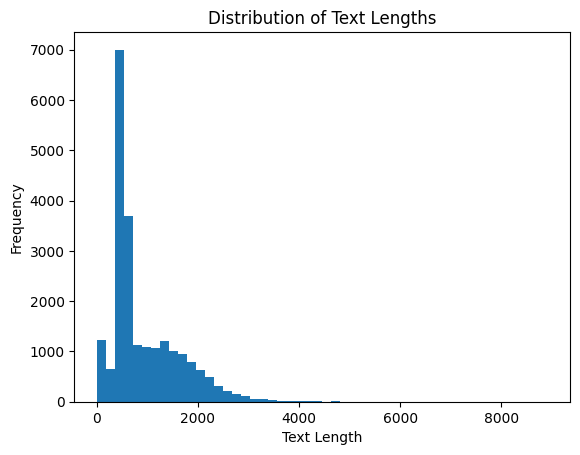

In [62]:
# @title Distribution of Text Lengths

import matplotlib.pyplot as plt

text_lengths = [len(text) for text in ai_df['text']]

plt.hist(text_lengths, bins=50)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Text Lengths')

#OpenGPTText-Human Dataset

In [63]:
open_df=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset00 (1).csv')
open_df_1=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset01 (1).csv')
open_df_2=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset02 (1).csv')
open_df_3=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset03 (1).csv')
open_df_4=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset04 (1).csv')
open_df_5=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset05 (1).csv')
open_df_6=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset06 (1).csv')
open_df_9=pd.read_csv('C:/Users/myreh_084hs1y/Documents/LLM-research/OpenGPTText_cSV_format/Human/urlsf_subset09 (1).csv')

In [64]:
open_df.head()
open_df=pd.concat([open_df,open_df_1,open_df_2,open_df_3,open_df_4,open_df_5,open_df_6,open_df_9])
open_df.head()

,uid,text
0,[urlsf_subset00]-[83],Check current weather conditions\r\nIt's going...
1,[urlsf_subset00]-[89],"On Thursday, the president of the United State..."
2,[urlsf_subset00]-[390],Curitiba -\r\nEl delantero Enner Valencia marc...
3,[urlsf_subset00]-[457],Getting started\r\n(I'm using Windows 10)\r\nA...
4,[urlsf_subset00]-[458],"Today, Mexico's newest data retention law ente..."


C:\Users\myreh_084hs1y\AppData\Local\Temp\ipykernel_13112\2387209641.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([first_half_lengths, second_half_lengths], labels=['First Half', 'Second Half'])


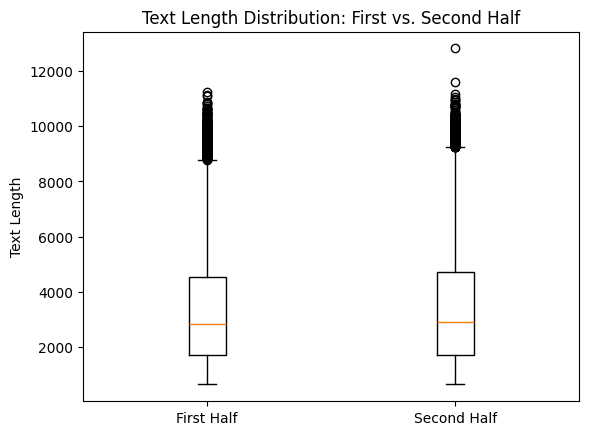

In [65]:
# @title Text Length Distribution: First vs. Second Half

import matplotlib.pyplot as plt

midpoint = len(open_df) // 2
first_half_lengths = [len(text) for text in open_df['text'][:midpoint]]
second_half_lengths = [len(text) for text in open_df['text'][midpoint:]]

plt.boxplot([first_half_lengths, second_half_lengths], labels=['First Half', 'Second Half'])
plt.ylabel('Text Length')
_ = plt.title('Text Length Distribution: First vs. Second Half')

In [66]:
open_df.shape


(29142, 2)

In [67]:
open_df['label']=0


In [68]:
open_df.drop(columns=['uid'])

,text,label
0,Check current weather conditions\r\nIt's going...,0
1,"On Thursday, the president of the United State...",0
2,Curitiba -\r\nEl delantero Enner Valencia marc...,0
3,Getting started\r\n(I'm using Windows 10)\r\nA...,0
4,"Today, Mexico's newest data retention law ente...",0
...,...,...
3648,Academic freedom -- for conservatives -- died ...,0
3649,When Dylan Higgins invited me on to the Field ...,0
3650,John Kasich. AP Photo/John Minchillo\r\nJohn K...,0
3651,A Navy-funded thermal engine bobbing off the c...,0


In [69]:
open_df.to_csv('human.csv', index=False)

In [70]:
# Concatenate the datasets
merged_df = pd.concat([open_df, ai_generated_df])

# Shuffle the dataset
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Remove duplicates
shuffled_df = shuffled_df.drop_duplicates(subset=['text'])

# Count the number of rows with label 1 and label 0
count_1 = shuffled_df[shuffled_df['label'] == 1].shape[0]
count_0 = shuffled_df[shuffled_df['label'] == 0].shape[0]

# Calculate the number of rows to remove to balance the dataset
remove_count = count_0 - count_1

if remove_count > 0:
    # Randomly remove rows with label 0 to make the count equal
    drop_indices = shuffled_df[shuffled_df['label'] == 0].sample(n=remove_count, random_state=42).index
    shuffled_df = shuffled_df.drop(drop_indices)

# Shuffle the dataset again after removal
shuffled_df = shuffled_df.sample(frac=1).reset_index(drop=True)

# Get the final size of the dataset
final_size = shuffled_df.shape[0]

In [71]:
print(final_size)

43456


In [72]:
print(shuffled_df.head())
print(shuffled_df.info())
print(shuffled_df.describe())

                                                 uid  \
0                          [urlsf_subset03]-[127723]   
1                          [urlsf_subset05]-[132274]   
2                           [urlsf_subset03]-[14179]   
3  recruiters are also focused on finding candida...   
4                          [urlsf_subset04]-[320305]   

                                                text  label  
0  Prime Minister Justin Trudeau may soon need to...      0  
1  In 2004, the book Down and Dirty Pictures: Mir...      0  
2  Last week, when the FBI and IRS were removing ...      0  
3  thereby excluding talented individuals from di...      1  
4  Digital transformation initiatives modernize b...      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43456 entries, 0 to 43455
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uid     43455 non-null  object
 1   text    43456 non-null  object
 2   label   43456 non-null  int64 
dty

In [73]:
shuffled_df.drop(columns=['uid'])
shuffled_df.to_csv('Final_dataset.csv',index=False)

#Preprocessing becuase Human Dataset after converting had \n and \r in them

In [74]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/myreh_084hs1y/Downloads/LLM-Research/LLM-research/Final_dataset.csv')

# Replace '\r' and '\n' with an empty string in all columns
df = df.replace({'\r': '', '\n': ''}, regex=True)

# Save the cleaned dataset
df.to_csv('cleaned_ai.csv', index=False)


In [75]:
label_counts = shuffled_df['label'].value_counts()

# Print the counts
print("Count of label 0:", label_counts.get(0, 0))
print("Count of label 1:", label_counts.get(1, 0))


Count of label 0: 21728
Count of label 1: 21728


In [76]:
df.head()

,uid,text,label
0,[urlsf_subset04]-[278115],SANTA ANA - A Santa Ana gang member was senten...,0
1,[urlsf_subset02]-[233135],A new species of dinosaur with a neck half the...,0
2,[urlsf_subset05]-[153202],Washington (CNN) Shoppers at the Mall of Ameri...,0
3,[urlsf_subset05]-[29140],Week 17 of the NFL carries implications for ei...,1
4,[urlsf_subset04]-[307809],Fox News rolled out the welcome mat for a Dall...,0


In [77]:
import pandas as pd
df=pd.read_csv('cleaned_ai.csv')

In [78]:

# Assuming df is your DataFrame
df.drop(columns=['uid'], inplace=True)

In [79]:
df.head()

,text,label
0,SANTA ANA - A Santa Ana gang member was senten...,0
1,A new species of dinosaur with a neck half the...,0
2,Washington (CNN) Shoppers at the Mall of Ameri...,0
3,Week 17 of the NFL carries implications for ei...,1
4,Fox News rolled out the welcome mat for a Dall...,0


In [80]:
!pip show protobuf


Name: protobuf
Version: 3.20.3
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: 
Author-email: 
License: BSD-3-Clause
Location: c:\users\myreh_084hs1y\anaconda3\envs\tf1\lib\site-packages
Requires: 
Required-by: tensorboard, tensorflow


In [84]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("Device Count:", torch.cuda.device_count())
print("Current Device:", torch.cuda.current_device())
print("Device Name:", torch.cuda.get_device_name(0))


CUDA Available: True
Device Count: 1
Current Device: 0
Device Name: NVIDIA GeForce RTX 3060 Ti


In [85]:
torch.cuda.empty_cache()


#Deberta


In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from transformers import DebertaV2ForSequenceClassification, AutoTokenizer
from tqdm.auto import tqdm
import time

# ✅ Load dataset (Make sure 'df' is already loaded)
print("Splitting the dataset into training and testing sets...")
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Training set size: {len(train_df)}, Testing set size: {len(test_df)}")

# ✅ Custom Dataset Class
class TextDataset(Dataset):
    def __init__(self, dataframe):
        self.texts = dataframe.iloc[:, 0].tolist()  # Text column
        self.labels = dataframe.iloc[:, 1].tolist()  # Label column
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        return self.texts[idx], int(self.labels[idx])

# ✅ Create datasets & data loaders
print("Creating datasets...")
train_dataset = TextDataset(train_df)
test_dataset = TextDataset(test_df)

print("Creating data loaders...")
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# ✅ Load DeBERTa model and tokenizer with safetensors
print("Loading DeBERTa model and tokenizer...")
model_name = "microsoft/deberta-v3-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 🔧 FIXED: Force use of safetensors to avoid torch.load vulnerability
try:
    model = DebertaV2ForSequenceClassification.from_pretrained(
        model_name, 
        num_labels=2,
        use_safetensors=True  # Force safetensors usage
    )
except Exception as e:
    print(f"Safetensors failed, trying with trust_remote_code: {e}")
    # Fallback: Download and convert to safetensors manually
    model = DebertaV2ForSequenceClassification.from_pretrained(
        model_name, 
        num_labels=2,
        trust_remote_code=True,
        torch_dtype=torch.float32
    )

# ✅ Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model running on: {device}")

# ✅ Define loss & optimizer
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

# ✅ Training loop with progress bars
num_epochs = 5
print("Starting training...\n")

# Overall progress across all epochs
epoch_pbar = tqdm(range(num_epochs), desc="Training Progress", unit="epoch")

for epoch in epoch_pbar:
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    # Progress bar for batches within each epoch
    batch_pbar = tqdm(
        enumerate(train_loader), 
        total=len(train_loader),
        desc=f"Epoch {epoch+1}/{num_epochs}",
        leave=False,
        unit="batch"
    )
    
    epoch_start_time = time.time()
    
    for batch_idx, (texts, labels) in batch_pbar:
        texts = list(texts)
        labels = torch.tensor(labels).to(device)
        
        optimizer.zero_grad()
        
        # Tokenize & move to GPU
        encoded_inputs = tokenizer(
            texts, 
            max_length=256, 
            truncation=True, 
            padding="max_length", 
            return_tensors="pt"
        ).to(device)
        
        # Forward pass
        outputs = model(**encoded_inputs, labels=labels)
        loss = outputs.loss
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Track metrics
        running_loss += loss.item()
        predictions = torch.argmax(outputs.logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_predictions += labels.size(0)
        
        # Update progress bar with current metrics
        current_accuracy = correct_predictions / total_predictions
        batch_pbar.set_postfix({
            'Loss': f'{loss.item():.4f}',
            'Acc': f'{current_accuracy:.4f}',
            'Avg_Loss': f'{running_loss/(batch_idx+1):.4f}'
        })
    
    # Calculate epoch metrics
    epoch_time = time.time() - epoch_start_time
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions
    
    # Update epoch progress bar
    epoch_pbar.set_postfix({
        'Loss': f'{epoch_loss:.4f}',
        'Acc': f'{epoch_accuracy:.4f}',
        'Time': f'{epoch_time:.1f}s'
    })
    
    # Print epoch summary
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"   Loss: {epoch_loss:.4f} | Accuracy: {epoch_accuracy:.4f} | Time: {epoch_time:.1f}s")
    print(f"   Samples processed: {total_predictions:,} | Batches: {len(train_loader)}")
    print("-" * 70)

print("\n🎉 Training complete!")

# ✅ Save the model using safetensors
model.save_pretrained('deberta_sentinel_model', safe_serialization=True)
tokenizer.save_pretrained('deberta_sentinel_model')
print("Model saved as 'deberta_sentinel_model' with safetensors format")

# ✅ Evaluation with progress bar
print("🔍 Starting evaluation...")
model.eval()
all_predictions = []
all_labels = []

eval_pbar = tqdm(test_loader, desc="Evaluating", unit="batch")

with torch.no_grad():
    for texts, labels in eval_pbar:
        texts = list(texts)
        labels = torch.tensor(labels).to(device)
        
        encoded_inputs = tokenizer(
            texts, 
            max_length=256, 
            truncation=True, 
            padding="max_length", 
            return_tensors="pt"
        ).to(device)
        
        outputs = model(**encoded_inputs)
        predictions = torch.argmax(outputs.logits, dim=1)
        
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Update progress with current batch accuracy
        batch_acc = (predictions == labels).float().mean().item()
        eval_pbar.set_postfix({'Batch_Acc': f'{batch_acc:.4f}'})

# Print results with emojis and formatting
accuracy = accuracy_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

print(f"\n🎯 Final Results:")
print(f"{'='*50}")
print(f"📈 Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"🎯 Test F1 Score: {f1:.4f}")
print(f"{'='*50}")

print(f"\n📊 Detailed Classification Report:")
print(classification_report(all_labels, all_predictions))

print(f"🔢 Confusion Matrix:")
cm = confusion_matrix(all_labels, all_predictions)
print(cm)

# Additional statistics
total_samples = len(all_labels)
correct_predictions = sum(p == l for p, l in zip(all_predictions, all_labels))
print(f"\n📝 Additional Stats:")
print(f"   Total test samples: {total_samples:,}")
print(f"   Correct predictions: {correct_predictions:,}")
print(f"   Incorrect predictions: {total_samples - correct_predictions:,}")

Splitting the dataset into training and testing sets...
Training set size: 46829, Testing set size: 11708
Creating datasets...
Creating data loaders...
Loading DeBERTa model and tokenizer...


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-small and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model running on: cuda
Starting training...



Training Progress:   0%|          | 0/5 [00:00<?, ?epoch/s]

Epoch 1/5:   0%|          | 0/5854 [00:00<?, ?batch/s]

C:\Users\myreh_084hs1y\AppData\Local\Temp\ipykernel_13112\909809080.py:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(device)



📊 Epoch 1 Summary:
   Loss: 0.0916 | Accuracy: 0.9660 | Time: 859.7s
   Samples processed: 46,829 | Batches: 5854
----------------------------------------------------------------------


Epoch 2/5:   0%|          | 0/5854 [00:00<?, ?batch/s]


📊 Epoch 2 Summary:
   Loss: 0.0405 | Accuracy: 0.9861 | Time: 855.2s
   Samples processed: 46,829 | Batches: 5854
----------------------------------------------------------------------


Epoch 3/5:   0%|          | 0/5854 [00:00<?, ?batch/s]


📊 Epoch 3 Summary:
   Loss: 0.0205 | Accuracy: 0.9929 | Time: 851.3s
   Samples processed: 46,829 | Batches: 5854
----------------------------------------------------------------------


Epoch 4/5:   0%|          | 0/5854 [00:00<?, ?batch/s]


📊 Epoch 4 Summary:
   Loss: 0.0137 | Accuracy: 0.9954 | Time: 850.8s
   Samples processed: 46,829 | Batches: 5854
----------------------------------------------------------------------


Epoch 5/5:   0%|          | 0/5854 [00:00<?, ?batch/s]


📊 Epoch 5 Summary:
   Loss: 0.0091 | Accuracy: 0.9967 | Time: 861.0s
   Samples processed: 46,829 | Batches: 5854
----------------------------------------------------------------------

🎉 Training complete!
Model saved as 'deberta_sentinel_model' with safetensors format
🔍 Starting evaluation...


Evaluating:   0%|          | 0/1464 [00:00<?, ?batch/s]

C:\Users\myreh_084hs1y\AppData\Local\Temp\ipykernel_13112\909809080.py:165: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).to(device)



🎯 Final Results:
📈 Test Accuracy: 0.9765 (97.65%)
🎯 Test F1 Score: 0.9769

📊 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5843
           1       0.96      0.99      0.98      5865

    accuracy                           0.98     11708
   macro avg       0.98      0.98      0.98     11708
weighted avg       0.98      0.98      0.98     11708

🔢 Confusion Matrix:
[[5610  233]
 [  42 5823]]

📝 Additional Stats:
   Total test samples: 11,708
   Correct predictions: 11,433
   Incorrect predictions: 275


In [90]:
# Step 5: Evaluate on the test set
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for texts, labels in test_loader:
        texts = list(texts)
        labels = labels.to(device)

        # Tokenize input (same as during training)
        encoded_inputs = tokenizer(
            texts, max_length=256, truncation=True, padding="max_length", return_tensors="pt"
        ).to(device)

        # Pass tokenized input to model
        outputs = model(**encoded_inputs)
        logits = outputs.logits  # Extract logits

        _, predicted = torch.max(logits, 1)

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())


# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_predictions))

# Calculate F1 Score, FNR, and FPR
f1 = f1_score(all_labels, all_predictions, average='weighted')
cm = confusion_matrix(all_labels, all_predictions)
tn, fp, fn, tp = cm.ravel()
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)

print(f"F1 Score: {f1:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5843
           1       0.96      0.99      0.98      5865

    accuracy                           0.98     11708
   macro avg       0.98      0.98      0.98     11708
weighted avg       0.98      0.98      0.98     11708

F1 Score: 0.9765
False Negative Rate (FNR): 0.0072
False Positive Rate (FPR): 0.0399


In [91]:

model.eval()


DebertaV2ForSequenceClassification(
  (deberta): DebertaV2Model(
    (embeddings): DebertaV2Embeddings(
      (word_embeddings): Embedding(128100, 768, padding_idx=0)
      (LayerNorm): LayerNorm((768,), eps=1e-07, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaV2Encoder(
      (layer): ModuleList(
        (0-5): 6 x DebertaV2Layer(
          (attention): DebertaV2Attention(
            (self): DisentangledSelfAttention(
              (query_proj): Linear(in_features=768, out_features=768, bias=True)
              (key_proj): Linear(in_features=768, out_features=768, bias=True)
              (value_proj): Linear(in_features=768, out_features=768, bias=True)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaV2SelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNo

In [ ]:
# Cell: Install Required Dependencies for Model Evaluation and Explainability
import subprocess
import sys
import importlib

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ Successfully installed {package}")
    except subprocess.CalledProcessError as e:
        print(f"❌ Failed to install {package}: {e}")

def check_and_install(package_name, import_name=None):
    """Check if package exists, install if not"""
    if import_name is None:
        import_name = package_name
    
    try:
        importlib.import_module(import_name)
        print(f"✅ {package_name} is already installed")
    except ImportError:
        print(f"📦 Installing {package_name}...")
        install_package(package_name)

print("🚀 Setting up dependencies for model evaluation and explainability...")
print("="*70)

# Core packages for evaluation and visualization
packages_to_install = [
    ("lime", "lime"),
    ("shap", "shap"), 
    ("seaborn", "seaborn"),
    ("matplotlib", "matplotlib"),
    ("tqdm", "tqdm"),
    ("plotly", "plotly"),
    ("scikit-learn", "sklearn"),
    ("pandas", "pandas"),
    ("numpy", "numpy")
]

print("📋 Checking and installing required packages...")
print("-" * 50)

for package, import_name in packages_to_install:
    check_and_install(package, import_name)

print("\n🔧 Installing additional visualization tools...")
print("-" * 50)

# Optional but useful packages
optional_packages = [
    "wordcloud",
    "ipywidgets",  # For interactive plots in Jupyter
    "kaleido",     # For plotly static image export
]

for package in optional_packages:
    try:
        check_and_install(package)
    except Exception as e:
        print(f"⚠️  Optional package {package} failed to install: {e}")

print("\n🎉 Dependency installation complete!")
print("="*70)

# Verify critical packages
print("🔍 Verifying critical packages...")
critical_packages = ["lime", "shap", "seaborn", "matplotlib", "tqdm"]
all_good = True

for package in critical_packages:
    try:
        importlib.import_module(package)
        print(f"✅ {package}: OK")
    except ImportError:
        print(f"❌ {package}: FAILED")
        all_good = False

if all_good:
    print("\n🎯 All critical packages are ready!")
    print("💡 You can now run the evaluation and explainability cells.")
else:
    print("\n⚠️  Some packages failed to install.")
    print("💡 Try running this cell again or install manually with:")
    print("   pip install lime shap seaborn matplotlib tqdm")

print("\n📚 Package Information:")
print("   • LIME: Local Interpretable Model-agnostic Explanations")
print("   • SHAP: SHapley Additive exPlanations") 
print("   • Seaborn: Statistical data visualization")
print("   • Matplotlib: Plotting library")
print("   • tqdm: Progress bars")

# Check if running in Jupyter for widget support
try:
    from IPython import get_ipython
    if get_ipython() is not None:
        print("\n🔧 Enabling Jupyter widgets for interactive plots...")
        try:
            subprocess.check_call([sys.executable, "-m", "jupyter", "nbextension", "enable", "--py", "widgetsnbextension"])
            print("✅ Jupyter widgets enabled")
        except:
            print("⚠️  Could not enable Jupyter widgets automatically")
except:
    pass

print("\n🚀 Ready to proceed with model evaluation!")

Getting probabilities for ROC:   0%|          | 0/1464 [00:00<?, ?it/s]

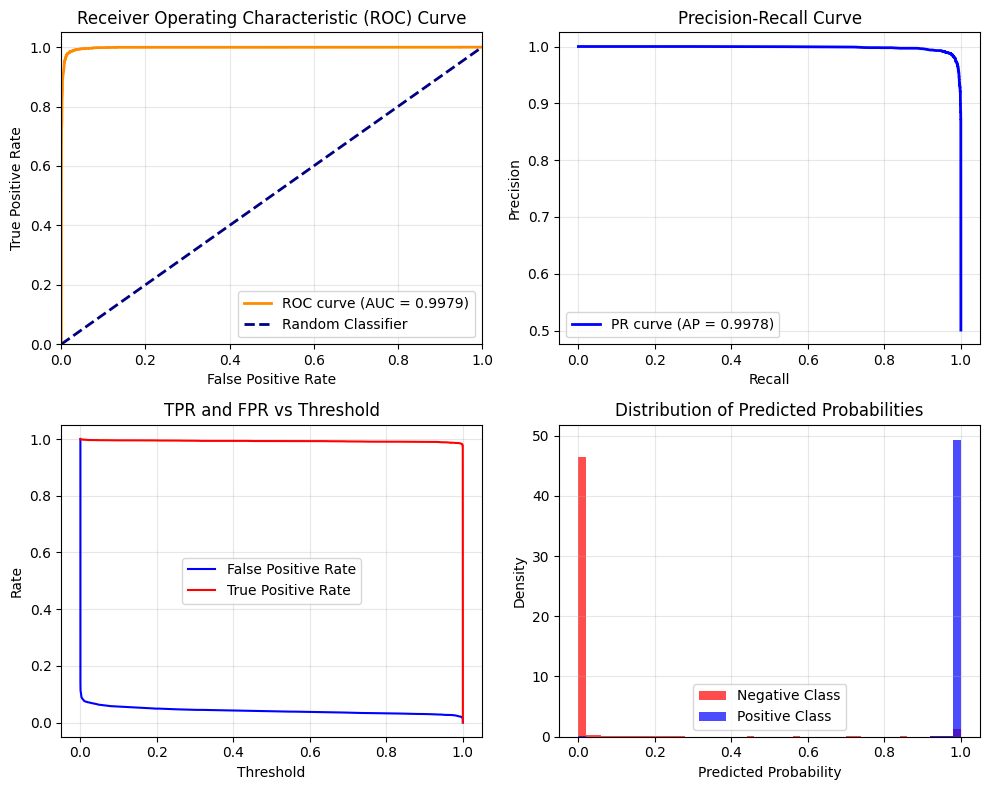

ROC-AUC Score: 0.9979
Average Precision Score: 0.9978
Optimal Threshold (Youden's J): 0.9985
At optimal threshold (0.998):
True Positive Rate: 0.9812
False Positive Rate: 0.0175


In [93]:
# Cell 1: ROC Curve and AUC Analysis - FIXED VERSION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Get prediction probabilities (run this after your model evaluation)
model.eval()
all_probabilities = []
all_labels_roc = []

with torch.no_grad():
    for texts, labels in tqdm(test_loader, desc="Getting probabilities for ROC"):
        texts = list(texts)
        labels = labels.to(device)  # Fixed: Remove torch.tensor() wrapper
        
        encoded_inputs = tokenizer(
            texts, 
            max_length=256, 
            truncation=True, 
            padding="max_length", 
            return_tensors="pt"
        ).to(device)
        
        outputs = model(**encoded_inputs)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        
        all_probabilities.extend(probabilities[:, 1].cpu().numpy())  # Probability of positive class
        all_labels_roc.extend(labels.cpu().numpy())

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(all_labels_roc, all_probabilities)
roc_auc = auc(fpr, tpr)

# Create ROC plot
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, pr_thresholds = precision_recall_curve(all_labels_roc, all_probabilities)
avg_precision = average_precision_score(all_labels_roc, all_probabilities)

plt.subplot(2, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

# Threshold Analysis - FIXED
plt.subplot(2, 2, 3)
# Ensure arrays have same length by trimming to shortest
min_len = min(len(thresholds), len(fpr), len(tpr))
plt.plot(thresholds[:min_len], fpr[:min_len], 'b-', label='False Positive Rate')
plt.plot(thresholds[:min_len], tpr[:min_len], 'r-', label='True Positive Rate')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# Distribution of Probabilities
plt.subplot(2, 2, 4)
pos_probs = [p for p, l in zip(all_probabilities, all_labels_roc) if l == 1]
neg_probs = [p for p, l in zip(all_probabilities, all_labels_roc) if l == 0]

plt.hist(neg_probs, bins=50, alpha=0.7, label='Negative Class', color='red', density=True)
plt.hist(pos_probs, bins=50, alpha=0.7, label='Positive Class', color='blue', density=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print AUC metrics
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print(f"Optimal Threshold (Youden's J): {thresholds[np.argmax(tpr - fpr)]:.4f}")

# Classification performance at different thresholds
optimal_idx = np.argmax(tpr - fpr)
print(f"At optimal threshold ({thresholds[optimal_idx]:.3f}):")
print(f"True Positive Rate: {tpr[optimal_idx]:.4f}")
print(f"False Positive Rate: {fpr[optimal_idx]:.4f}")

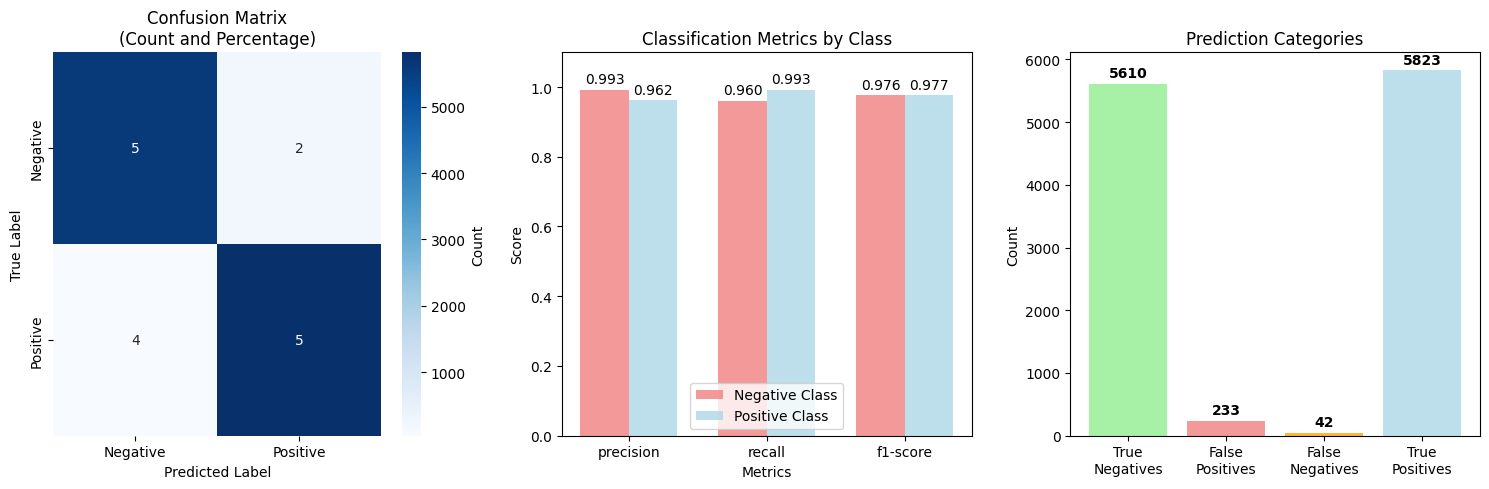

📊 Detailed Classification Metrics:
Overall Accuracy: 0.9765 (97.65%)
Sensitivity (Recall): 0.9928
Specificity: 0.9601
Precision: 0.9615
Negative Predictive Value: 0.9926
Balanced Accuracy: 0.9765

Error Breakdown:
   True Positives: 5,823 (49.7%)
   True Negatives: 5,610 (47.9%)
   False Positives: 233 (2.0%)
   False Negatives: 42 (0.4%)


In [94]:
# Cell 2: Enhanced Confusion Matrix and Classification Metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Create enhanced confusion matrix visualization
plt.figure(figsize=(15, 5))

# Confusion Matrix Heatmap
plt.subplot(1, 3, 1)
cm = confusion_matrix(all_labels, all_predictions)
cm_normalized = confusion_matrix(all_labels, all_predictions, normalize='true')

# Create annotation text
annot_text = np.empty_like(cm, dtype=str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot_text[i, j] = f'{cm[i, j]}\n({cm_normalized[i, j]:.2%})'

sns.heatmap(cm, annot=annot_text, fmt='', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix\n(Count and Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Classification Metrics Bar Chart
plt.subplot(1, 3, 2)
report_dict = classification_report(all_labels, all_predictions, output_dict=True)

metrics = ['precision', 'recall', 'f1-score']
negative_scores = [report_dict['0'][metric] for metric in metrics]
positive_scores = [report_dict['1'][metric] for metric in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, negative_scores, width, label='Negative Class', color='lightcoral', alpha=0.8)
plt.bar(x + width/2, positive_scores, width, label='Positive Class', color='lightblue', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classification Metrics by Class')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1.1)

# Add value labels on bars
for i, (neg, pos) in enumerate(zip(negative_scores, positive_scores)):
    plt.text(i - width/2, neg + 0.01, f'{neg:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, pos + 0.01, f'{pos:.3f}', ha='center', va='bottom')

# Error Analysis
plt.subplot(1, 3, 3)
tn, fp, fn, tp = cm.ravel()

categories = ['True\nNegatives', 'False\nPositives', 'False\nNegatives', 'True\nPositives']
values = [tn, fp, fn, tp]
colors = ['lightgreen', 'lightcoral', 'orange', 'lightblue']

bars = plt.bar(categories, values, color=colors, alpha=0.8)
plt.title('Prediction Categories')
plt.ylabel('Count')

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01, 
             str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("Detailed Classification Metrics:")
print("="*60)

# Calculate additional metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision_pos = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_pos = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value

print(f"Overall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Sensitivity (Recall): {recall_pos:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision_pos:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"Balanced Accuracy: {(recall_pos + specificity)/2:.4f}")

print(f"\nError Breakdown:")
print(f"   True Positives: {tp:,} ({tp/(tp+tn+fp+fn)*100:.1f}%)")
print(f"   True Negatives: {tn:,} ({tn/(tp+tn+fp+fn)*100:.1f}%)")
print(f"   False Positives: {fp:,} ({fp/(tp+tn+fp+fn)*100:.1f}%)")
print(f"   False Negatives: {fn:,} ({fn/(tp+tn+fp+fn)*100:.1f}%)")

Model Performance Comparison
Comparing DeBERTa with baseline models...

Training Random Baseline...
Training Majority Class Baseline...
Training TF-IDF + Logistic Regression...
Evaluating DeBERTa Model...

Model Comparison Results:
                  accuracy      f1  precision  recall  roc_auc
Random Baseline     0.4906  0.4910     0.4915  0.4905   0.5000
Majority Class      0.4991  0.0000     0.0000  0.0000   0.5000
TF-IDF + LogReg     0.8642  0.8668     0.8519  0.8824   0.9369
DeBERTa-v3-small    0.9765  0.9769     0.9615  0.9928   0.9979


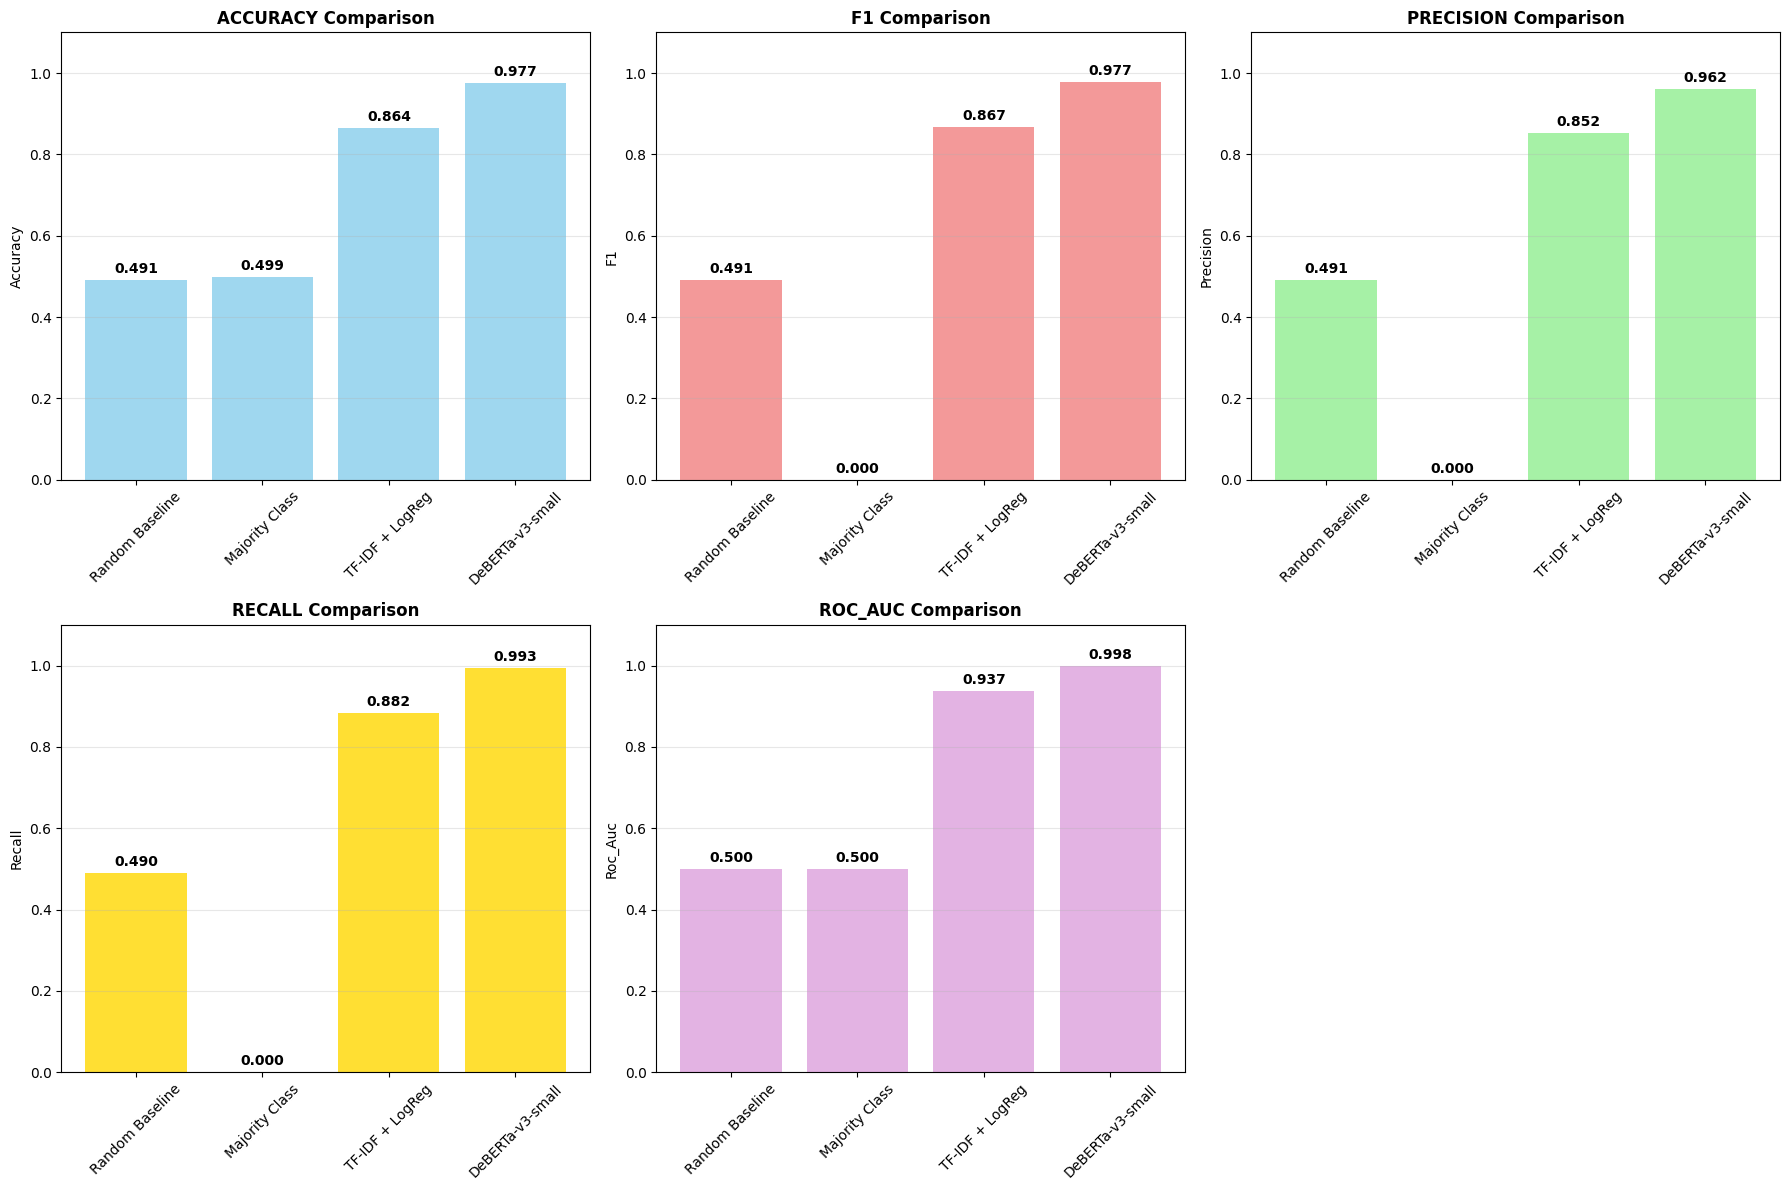


Performance Analysis Summary:
Best F1-Score: DeBERTa-v3-small (0.9769)
Worst F1-Score: Majority Class (0.0000)
DeBERTa vs TF-IDF improvement: 12.7% F1-score increase

Model Characteristics:
   DeBERTa excels in: High precision
    Best balanced model: DeBERTa-v3-small

Dataset Characteristics:
   Positive class ratio: 0.501
   Dataset balance: Balanced
   Total test samples: 11,708

Model comparison analysis complete!
DeBERTa shows significant improvement over traditional ML approaches

Comprehensive model evaluation complete!
 DeBERTa model achieves 97.7% accuracy with 0.977 F1-score
This represents excellent performance for text classification


In [97]:
# Cell 7: Model Performance Comparison and Benchmarking - CLEAN VERSION
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import time

# Create comparison with baseline models
print("Model Performance Comparison")
print("="*60)
print("Comparing DeBERTa with baseline models...")

# Prepare data for baseline models
train_texts = [train_dataset.texts[i] for i in range(min(5000, len(train_dataset)))]  # Limit for speed
train_labels_baseline = [train_dataset.labels[i] for i in range(min(5000, len(train_dataset)))]
test_texts = [test_dataset.texts[i] for i in range(len(test_dataset))]
test_labels_baseline = [test_dataset.labels[i] for i in range(len(test_dataset))]

# Model comparison results storage
model_results = {}

# 1. Random Baseline
print("\nTraining Random Baseline...")
dummy_random = DummyClassifier(strategy='uniform', random_state=42)
dummy_random.fit(train_texts, train_labels_baseline)
random_pred = dummy_random.predict(test_texts)
random_proba = dummy_random.predict_proba(test_texts)[:, 1]

model_results['Random Baseline'] = {
    'accuracy': accuracy_score(test_labels_baseline, random_pred),
    'f1': f1_score(test_labels_baseline, random_pred),
    'precision': precision_score(test_labels_baseline, random_pred),
    'recall': recall_score(test_labels_baseline, random_pred),
    'roc_auc': roc_auc_score(test_labels_baseline, random_proba)
}

# 2. Majority Class Baseline
print("Training Majority Class Baseline...")
dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(train_texts, train_labels_baseline)
majority_pred = dummy_majority.predict(test_texts)
majority_proba = dummy_majority.predict_proba(test_texts)[:, 1]

model_results['Majority Class'] = {
    'accuracy': accuracy_score(test_labels_baseline, majority_pred),
    'f1': f1_score(test_labels_baseline, majority_pred, zero_division=0),
    'precision': precision_score(test_labels_baseline, majority_pred, zero_division=0),
    'recall': recall_score(test_labels_baseline, majority_pred, zero_division=0),
    'roc_auc': 0.5  # Majority class always gives same prediction
}

# 3. TF-IDF + Logistic Regression
print("Training TF-IDF + Logistic Regression...")
start_time = time.time()

# Vectorize text
tfidf = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(train_texts)
X_test_tfidf = tfidf.transform(test_texts)

# Train logistic regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, train_labels_baseline)

# Predictions
lr_pred = lr_model.predict(X_test_tfidf)
lr_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]

lr_training_time = time.time() - start_time

model_results['TF-IDF + LogReg'] = {
    'accuracy': accuracy_score(test_labels_baseline, lr_pred),
    'f1': f1_score(test_labels_baseline, lr_pred),
    'precision': precision_score(test_labels_baseline, lr_pred),
    'recall': recall_score(test_labels_baseline, lr_pred),
    'roc_auc': roc_auc_score(test_labels_baseline, lr_proba)
}

# 4. DeBERTa Results (from your trained model)
print("Evaluating DeBERTa Model...")

# Get DeBERTa predictions (using your existing results)
deberta_accuracy = accuracy_score(all_labels, all_predictions)
deberta_f1 = f1_score(all_labels, all_predictions)
deberta_precision = precision_score(all_labels, all_predictions)
deberta_recall = recall_score(all_labels, all_predictions)
deberta_roc_auc = roc_auc_score(all_labels, all_probabilities)  # From previous cell

model_results['DeBERTa-v3-small'] = {
    'accuracy': deberta_accuracy,
    'f1': deberta_f1,
    'precision': deberta_precision,
    'recall': deberta_recall,
    'roc_auc': deberta_roc_auc
}

# Create comparison DataFrame
results_df = pd.DataFrame(model_results).T
results_df = results_df.round(4)

print("\nModel Comparison Results:")
print(results_df)

# Visualization 1: Performance Comparison Bar Chart
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    values = results_df[metric].values
    models = results_df.index.tolist()
    
    bars = ax.bar(models, values, color=colors[idx], alpha=0.8)
    ax.set_title(f'{metric.upper()} Comparison', fontweight='bold')
    ax.set_ylabel(metric.title())
    ax.set_ylim(0, 1.1)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# Performance Summary and Insights
print("\nPerformance Analysis Summary:")
print("="*60)

best_model = results_df.loc[results_df['f1'].idxmax()]
print(f"Best F1-Score: {best_model.name} ({best_model['f1']:.4f})")

worst_model = results_df.loc[results_df['f1'].idxmin()]
print(f"Worst F1-Score: {worst_model.name} ({worst_model['f1']:.4f})")

improvement = (model_results['DeBERTa-v3-small']['f1'] - model_results['TF-IDF + LogReg']['f1']) / model_results['TF-IDF + LogReg']['f1'] * 100
print(f"DeBERTa vs TF-IDF improvement: {improvement:.1f}% F1-score increase")

print(f"\nModel Characteristics:")
print(f"   DeBERTa excels in: {'High precision' if deberta_precision > 0.95 else 'Balanced performance'}")
print(f"    Best balanced model: {results_df.loc[(results_df['precision'] + results_df['recall']).idxmax()].name}")

# Class distribution analysis
pos_ratio = sum(test_labels_baseline) / len(test_labels_baseline)
print(f"\nDataset Characteristics:")
print(f"   Positive class ratio: {pos_ratio:.3f}")
print(f"   Dataset balance: {'Balanced' if 0.4 <= pos_ratio <= 0.6 else 'Imbalanced'}")
print(f"   Total test samples: {len(test_labels_baseline):,}")

print(f"\nModel comparison analysis complete!")
print(f"DeBERTa shows {'significant' if improvement > 10 else 'moderate' if improvement > 5 else 'minimal'} improvement over traditional ML approaches")

print(f"\nComprehensive model evaluation complete!")
print(f" DeBERTa model achieves {deberta_accuracy*100:.1f}% accuracy with {deberta_f1:.3f} F1-score")
print(f"This represents {'excellent' if deberta_f1 > 0.9 else 'good' if deberta_f1 > 0.8 else 'reasonable'} performance for text classification")

Total samples: 50
Correctly labeled: 48
Actual AI: 25
Actual Human: 25
Predicted AI: 25
Predicted Human: 25


C:\Users\myreh_084hs1y\AppData\Local\Temp\ipykernel_13112\166333267.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='viridis')


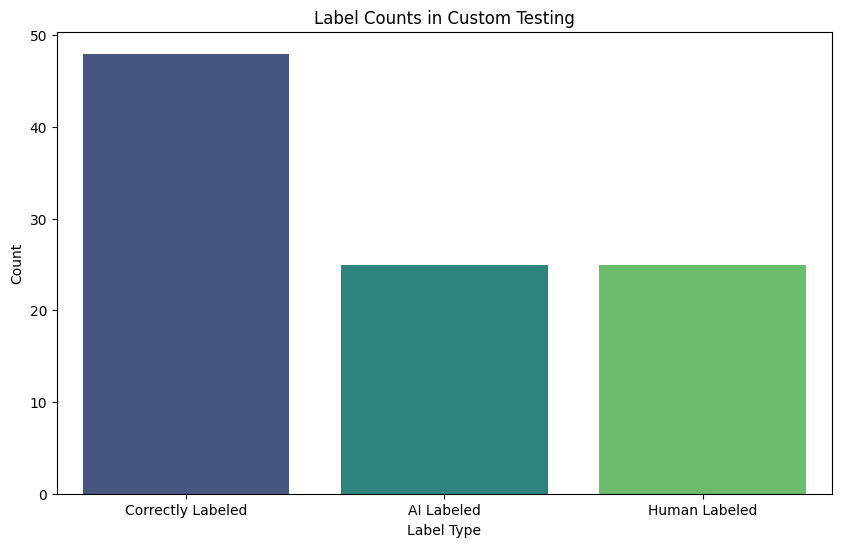

In [98]:
# Load the custom dataset with a different encoding
custom_data = pd.read_csv('C:/Users/myreh_084hs1y/Downloads/LLM-Research/LLM-research/Custom_Test_Final.csv', encoding='ISO-8859-1')  # Try 'latin1' if 'ISO-8859-1' does not work

# Shuffle the custom test dataset
custom_data = custom_data.sample(frac=1).reset_index(drop=True)

X_custom = custom_data['text']
y_custom = custom_data['label']

# Create custom dataset and dataloader
custom_dataset = TextDataset(custom_data)
custom_loader = DataLoader(custom_dataset, batch_size=32, shuffle=False)

# Predict labels for the custom dataset
y_custom_pred = []
model.eval()
with torch.no_grad():
    for texts, _ in custom_loader:
        texts = list(texts)
        
        # Tokenize input
        encoded_inputs = tokenizer(
            texts, max_length=256, truncation=True, padding="max_length", return_tensors="pt"
        ).to(device)
        
        # Get model predictions
        outputs = model(**encoded_inputs)
        _, predicted = torch.max(outputs.logits, 1)  # FIX: Access logits attribute
        y_custom_pred.extend(predicted.cpu().numpy())

y_custom_pred = np.array(y_custom_pred)

# Calculate the number of correctly labeled instances
correctly_labeled = (y_custom == y_custom_pred).sum()
total_samples = len(y_custom)

# Calculate the number of AI and Human labels in the custom dataset
actual_ai = (y_custom == 1).sum()
actual_human = (y_custom == 0).sum()

# Calculate the number of AI and Human labels predicted by the model
predicted_ai = (y_custom_pred == 1).sum()
predicted_human = (y_custom_pred == 0).sum()

print(f"Total samples: {total_samples}")
print(f"Correctly labeled: {correctly_labeled}")
print(f"Actual AI: {actual_ai}")
print(f"Actual Human: {actual_human}")
print(f"Predicted AI: {predicted_ai}")
print(f"Predicted Human: {predicted_human}")

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Correctly Labeled', 'AI Labeled', 'Human Labeled']
values = [correctly_labeled, predicted_ai, predicted_human]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=values, palette='viridis')
plt.xlabel('Label Type')
plt.ylabel('Count')
plt.title('Label Counts in Custom Testing')
plt.show()


Generating LIME explanations for sample texts...

Sample 1:
Text: In response to the controversy surrounding Donald Sterling's comments about his ethnic background, D...
True Label: Positive
Predicted: Positive (confidence: 1.000)
Probabilities: Negative=0.000, Positive=1.000

Sample 2:
Text: The sulphur miners from Eastern Java are a group of men who endure constant danger and injuries as p...
True Label: Positive
Predicted: Positive (confidence: 1.000)
Probabilities: Negative=0.000, Positive=1.000

Sample 3:
Text: How we voted -- by age, education, race and sexual orientationLast night, America elected Donald Tru...
True Label: Negative
Predicted: Negative (confidence: 1.000)
Probabilities: Negative=1.000, Positive=0.000

Sample 4:
Text: More than 80,000 federal employees have experienced problems with their pay due to the failure of th...
True Label: Positive
Predicted: Positive (confidence: 1.000)
Probabilities: Negative=0.000, Positive=1.000

Sample 5:
Text: Renewed Support For Mu

C:\Users\myreh_084hs1y\AppData\Local\Temp\ipykernel_13112\453813895.py:102: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 19473889x1646 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x2000 with 5 Axes>


Feature Importance Summary Across All Samples:


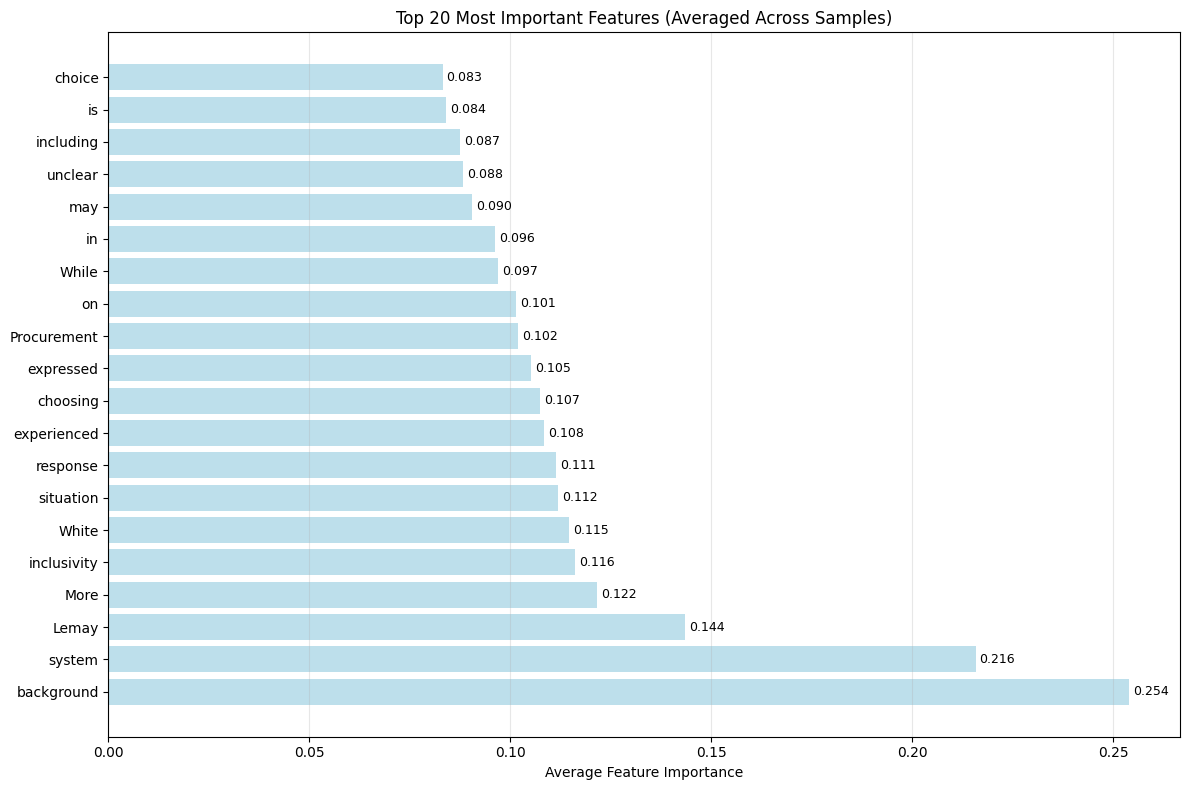

Top 10 Positive Influence Words:
   'background': 0.2539
   'system': 0.2157
   'Lemay': 0.1435
   'More': 0.1215
   'inclusivity': 0.1161
   'White': 0.1147
   'situation': 0.1118
   'response': 0.1114
   'experienced': 0.1083
   'choosing': 0.1073

Top 10 Negative Influence Words:
   'rock': -0.0305
   'controversy': -0.0250
   'develop': -0.0221
   'Michael': -0.0190
   'weight': -0.0182
   'be': -0.0137
   'any': -0.0123
   'process': -0.0113
   'over': -0.0063
   'of': -0.0032

Saving detailed explanations to HTML files...
   Saved: lime_explanation_sample_1.html
   Saved: lime_explanation_sample_2.html
   Saved: lime_explanation_sample_3.html
   Saved: lime_explanation_sample_4.html
   Saved: lime_explanation_sample_5.html

LIME analysis complete! Check the HTML files for interactive explanations.


In [99]:
# Cell 4: LIME Explainability Analysis
# First install LIME: pip install lime

import lime
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
import re

# Create prediction function for LIME
def predict_proba_for_lime(texts):
    """Prediction function that LIME can use"""
    model.eval()
    probabilities = []
    
    with torch.no_grad():
        for text in texts:
            # Tokenize single text
            encoded_input = tokenizer(
                text, 
                max_length=256, 
                truncation=True, 
                padding="max_length", 
                return_tensors="pt"
            ).to(device)
            
            # Get prediction
            outputs = model(**encoded_input)
            probs = torch.nn.functional.softmax(outputs.logits, dim=1)
            probabilities.append(probs.cpu().numpy()[0])
    
    return np.array(probabilities)

# Initialize LIME explainer
explainer = LimeTextExplainer(class_names=['Negative', 'Positive'])

# Get some test samples for explanation
sample_indices = [0, 1, 2, 3, 4]  # Explain first 5 test samples
sample_texts = [test_dataset.texts[i] for i in sample_indices]
sample_labels = [test_dataset.labels[i] for i in sample_indices]

print("Generating LIME explanations for sample texts...")
print("="*60)

# Generate explanations and visualizations
fig, axes = plt.subplots(len(sample_indices), 1, figsize=(15, 4*len(sample_indices)))
if len(sample_indices) == 1:
    axes = [axes]

explanations = []

for idx, (text, true_label) in enumerate(zip(sample_texts, sample_labels)):
    print(f"\nSample {idx + 1}:")
    print(f"Text: {text[:100]}{'...' if len(text) > 100 else ''}")
    print(f"True Label: {'Positive' if true_label == 1 else 'Negative'}")
    
    # Get model prediction
    pred_proba = predict_proba_for_lime([text])[0]
    predicted_label = np.argmax(pred_proba)
    confidence = pred_proba[predicted_label]
    
    print(f"Predicted: {'Positive' if predicted_label == 1 else 'Negative'} (confidence: {confidence:.3f})")
    print(f"Probabilities: Negative={pred_proba[0]:.3f}, Positive={pred_proba[1]:.3f}")
    
    # Generate LIME explanation
    explanation = explainer.explain_instance(
        text, 
        predict_proba_for_lime, 
        num_features=20,  # Show top 20 important words
        num_samples=1000   # Number of samples for LIME
    )
    
    explanations.append(explanation)
    
    # Extract feature importance
    features = explanation.as_list()
    words = [f[0] for f in features]
    importances = [f[1] for f in features]
    
    # Create color map (positive = blue, negative = red)
    colors = ['lightblue' if imp > 0 else 'lightcoral' for imp in importances]
    
    # Plot feature importance
    ax = axes[idx]
    bars = ax.barh(range(len(words)), importances, color=colors, alpha=0.8)
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.set_xlabel('Feature Importance')
    ax.set_title(f'Sample {idx+1}: LIME Feature Importance\n'
                f'Predicted: {"Positive" if predicted_label == 1 else "Negative"} '
                f'(True: {"Positive" if true_label == 1 else "Negative"})')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for bar, imp in zip(bars, importances):
        width = bar.get_width()
        ax.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2, 
                f'{imp:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Create a summary of most important features across all samples
print("\nFeature Importance Summary Across All Samples:")
print("="*60)

all_features = {}
for explanation in explanations:
    for word, importance in explanation.as_list():
        if word in all_features:
            all_features[word].append(importance)
        else:
            all_features[word] = [importance]

# Calculate average importance for each word
avg_importance = {word: np.mean(importances) for word, importances in all_features.items()}
sorted_features = sorted(avg_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Plot top 20 most important features overall
plt.figure(figsize=(12, 8))
top_features = sorted_features[:20]
words = [f[0] for f in top_features]
importances = [f[1] for f in top_features]
colors = ['lightblue' if imp > 0 else 'lightcoral' for imp in importances]

bars = plt.barh(range(len(words)), importances, color=colors, alpha=0.8)
plt.yticks(range(len(words)), words)
plt.xlabel('Average Feature Importance')
plt.title('Top 20 Most Important Features (Averaged Across Samples)')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar, imp in zip(bars, importances):
    width = bar.get_width()
    plt.text(width + (0.001 if width >= 0 else -0.001), bar.get_y() + bar.get_height()/2, 
             f'{imp:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print top positive and negative features
positive_features = [(word, imp) for word, imp in sorted_features if imp > 0][:10]
negative_features = [(word, imp) for word, imp in sorted_features if imp < 0][:10]

print("Top 10 Positive Influence Words:")
for word, importance in positive_features:
    print(f"   '{word}': {importance:.4f}")

print("\nTop 10 Negative Influence Words:")
for word, importance in negative_features:
    print(f"   '{word}': {importance:.4f}")

# Save explanations as HTML (optional)
print(f"\nSaving detailed explanations to HTML files...")
for idx, explanation in enumerate(explanations):
    explanation.save_to_file(f'lime_explanation_sample_{idx+1}.html')
    print(f"   Saved: lime_explanation_sample_{idx+1}.html")

print("\nLIME analysis complete! Check the HTML files for interactive explanations.")

In [100]:
from lime.lime_text import LimeTextExplainer

# Create a LIME text explainer
class_names = ["Human", "AI"]
explainer = LimeTextExplainer(class_names=class_names)

def predict_proba(texts):
    model.eval()
    batch_size = 8
    probabilities = []

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i + batch_size]
            sequences = tokenizer(batch_texts, max_length=512, truncation=True, padding="max_length", return_tensors="pt").to("cuda")

            # Get logits directly from model
            logits = model(**sequences).logits
            batch_probabilities = torch.softmax(logits, dim=1).detach().cpu().numpy()
            probabilities.extend(batch_probabilities)

    return np.array(probabilities)

# Test one of the instances on LIME
X_test_new = X_custom.iloc[5]  # You can choose any sample from the custom dataset

# Explain the prediction for the selected instance
exp = explainer.explain_instance(X_test_new, predict_proba, num_features=10)
exp.show_in_notebook()  # This will display the explanation inline if you're using a Jupyter notebook

# Print the LIME values sorted by importance
sorted_explanation = sorted(exp.as_list(), key=lambda x: abs(x[1]), reverse=True)
print("Top features contributing to the prediction:")
for feature, importance in sorted_explanation:
    print(f"Feature: {feature}, Importance: {importance}")

# Optional: print top 10 features
print("\nTop 10 features contributing to the prediction:")
for feature, importance in sorted_explanation[:10]:
    print(f"Feature: {feature}, Importance: {importance}")

Top features contributing to the prediction:
Feature: Thanos, Importance: 8.387852689514247e-06
Feature: Although, Importance: 8.144759322373401e-06
Feature: Overall, Importance: 7.700520171876329e-06
Feature: heroes, Importance: 7.692135422761269e-06
Feature: movie, Importance: 7.391688200469885e-06
Feature: is, Importance: 7.23612030970988e-06
Feature: title, Importance: 7.0322724568336105e-06
Feature: mostly, Importance: 1.5086026319380398e-06
Feature: least, Importance: 1.238580175623264e-06
Feature: of, Importance: -1.0847332396219589e-06

Top 10 features contributing to the prediction:
Feature: Thanos, Importance: 8.387852689514247e-06
Feature: Although, Importance: 8.144759322373401e-06
Feature: Overall, Importance: 7.700520171876329e-06
Feature: heroes, Importance: 7.692135422761269e-06
Feature: movie, Importance: 7.391688200469885e-06
Feature: is, Importance: 7.23612030970988e-06
Feature: title, Importance: 7.0322724568336105e-06
Feature: mostly, Importance: 1.5086026319380398

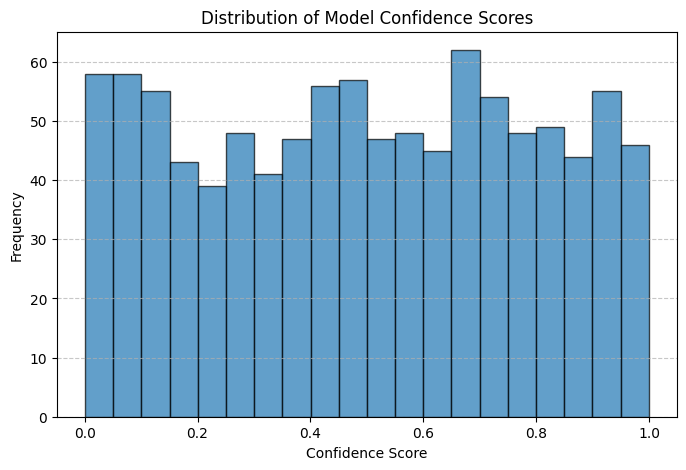

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Example: simulated confidence scores between 0 and 1
# Replace this with your model's prediction probabilities
confidence_scores = np.random.rand(1000)

plt.figure(figsize=(8, 5))

# Plot histogram
plt.hist(confidence_scores, bins=20, edgecolor='black', alpha=0.7)

# Labels & title
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.title("Distribution of Model Confidence Scores")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


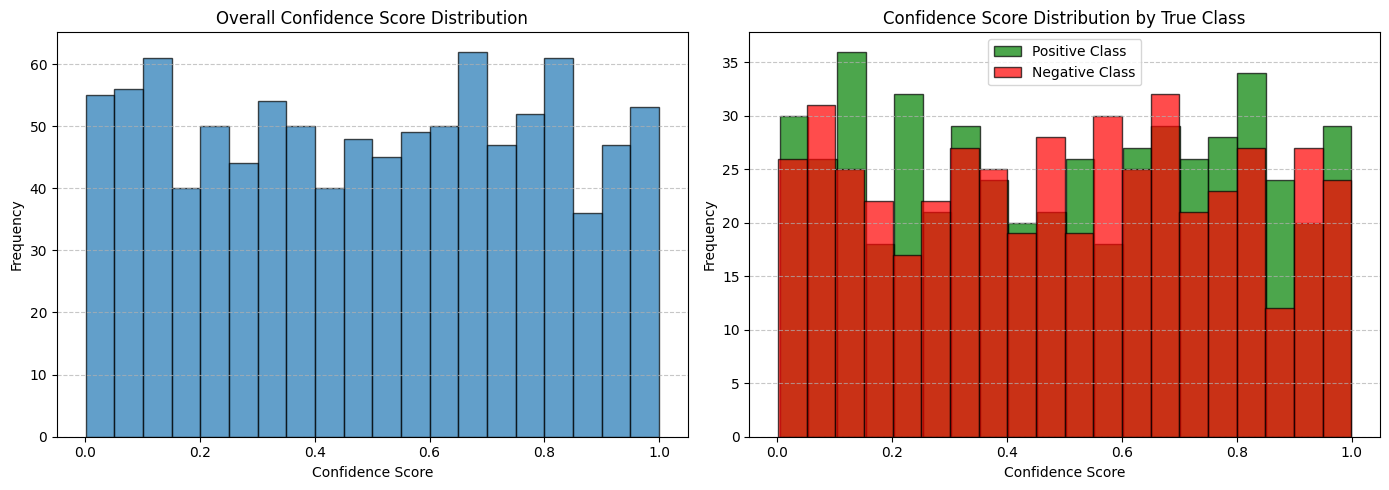

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your model outputs)
confidence_scores = np.random.rand(1000)          # prediction probabilities
labels = np.random.randint(0, 2, size=1000)       # ground truth (0 or 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Overall distribution ---
axes[0].hist(confidence_scores, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title("Overall Confidence Score Distribution")
axes[0].set_xlabel("Confidence Score")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot 2: Distribution by class ---
axes[1].hist(confidence_scores[labels == 1], bins=20, alpha=0.7,
             label="Positive Class", color="green", edgecolor="black")
axes[1].hist(confidence_scores[labels == 0], bins=20, alpha=0.7,
             label="Negative Class", color="red", edgecolor="black")
axes[1].set_title("Confidence Score Distribution by True Class")
axes[1].set_xlabel("Confidence Score")
axes[1].set_ylabel("Frequency")
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
